In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Import Dataset train and test

In [2]:
df_train = pd.read_csv('./Case Study Chapter 2 Topic 6_ Data Train.csv')
df_test = pd.read_csv('./Case Study Chapter 2 Topic 6_ Data Test.csv')

## Data Pre-processing

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Check the type of data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Make a function for calculation null value / missing value

In [7]:
def cal_null(df):
    null_val = df.isna().sum().sort_values(ascending=False)
    persent_nan = round(null_val/len(df)*100, 2)
    return persent_nan

In [8]:
#Null in Data Train
pd.DataFrame({
    'NaN %': cal_null(df_train).head()
})

,NaN %
Cabin,77.10
Age,19.87
Embarked,0.22
PassengerId,0.00
Survived,0.00


In [9]:
#Null in Data Test
pd.DataFrame({
    'NaN %': cal_null(df_test).head()
})

,NaN %
Cabin,78.23
Age,20.57
Fare,0.24
PassengerId,0.00
Pclass,0.00


<h4>Terdapat beberapa missing value / null value pada data train dan test</h4>
<span style="color:orange"> Terdapat banyak data yang hilang pada kolom Cabin </span> <br>
<span style="color:orange"> Ada data yang hilang pada kolom Age dan Fare </span>

Untuk kolom Cabin, terdapat banyak data yang hilang, sehingga sulit untuk menentukan nilai yang tepat untuk mengganti data yang hilang. Namun, jika kolom ini tidak terlalu penting dalam analisis atau model, Anda dapat mengabaikannya atau menghapus kolom tersebut dari dataset.

Sedangkan untuk kolom Age dan Fare, jika jumlah data yang hilang relatif sedikit, Anda dapat menggantinya dengan nilai rata-rata atau median dari data yang ada. Namun, jika jumlah data yang hilang sangat besar, penggantian nilai dapat menyebabkan bias dalam analisis atau prediksi, sehingga perlu dilakukan penanganan yang lebih cermat.

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Berikut adalah informasi yang kita miliki:

    1. Data male paling banyak terjadi, yaitu sebanyak 577 dari 891 data.
    2. Terdapat duplikasi data pada kolom Ticket dan Cabin.
    3. Embarked dengan nilai S adalah yang paling sering muncul sebanyak 644 kali dari total 891 data.
    4. Data pada kolom Age dan Fare merupakan data numerik kontinu.
    5. Data pada kolom Survived dan Sex merupakan Data kategori nominal.
    6. Data pada kolom Pclass, SibSp, dan Parch merupakan Data diskrit.

## Merge Data Train and Test

In [12]:
df = [df_train, df_test]

In [13]:
df

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

#### Fill the missing value

In [14]:
# Looping dilakukan pada setiap data dalam dataframe df
for data in df:
    # Menghitung modus dari kolom 'Embarked' pada setiap data dan menyimpannya dalam variabel 'mod'
    mod = data.Embarked.mode()[0]
    # Mengisi nilai yang kosong (null value) pada kolom 'Embarked' dengan modus yang telah dihitung pada setiap data
    data['Embarked'].fillna(mod, inplace=True)


In [15]:
df_test['Fare'].fillna(df_test['Fare'].mode()[0],inplace=True)

## Drop Column

In [16]:
# Looping dilakukan pada setiap data dalam dataframe df untuk menghapus kolom 'Cabin' dan 'Ticket'
for data in df:
    data.drop(columns=['Cabin','Ticket'], inplace=True)

# Menghapus kolom 'PassengerId' dari dataframe df_train
df_train.drop(columns='PassengerId', inplace=True)

In [17]:
print(f'Train shape :{df_train.shape}',f'test shape :{df_test.shape}')

Train shape :(891, 9) test shape :(418, 9)


## Encode Data to INT

In [18]:
# Menggunakan loop untuk mengubah nilai pada kolom "Sex" dalam setiap baris pada dataframe "df"
# Kolom "Sex" akan diubah dari nilai string menjadi nilai integer menggunakan fungsi replace()
# Setiap nilai pada kolom "Sex" yang awalnya "female" akan diubah menjadi nilai integer 0 dan yang awalnya "male" akan diubah menjadi nilai integer 1
# Akhirnya, kolom "Sex" akan diubah tipe datanya menjadi integer menggunakan fungsi astype()

for i in df:
    i['Sex'] = i['Sex'].replace({'female': 0, 'male': 1}).astype('int')

In [19]:
for i in df:
    i['Embarked'] = i.Embarked.astype('category').cat.codes

In [20]:
# Looping untuk setiap dataframe pada variabel "df"
# Pada setiap iterasi, menghitung nilai rata-rata umur berdasarkan kombinasi nilai pada kolom "Pclass" dan "Sex" menggunakan metode groupby()
# Kemudian, pada setiap kombinasi nilai pada kolom "Pclass" dan "Sex", menggunakan looping untuk mengisi nilai yang hilang pada kolom "Age" dengan nilai rata-rata umur yang sesuai
# Output berupa dataframe "df" yang sudah diisi nilai rata-rata umur pada kolom "Age" untuk setiap nilai yang hilang

for data in df:
    # Menghitung nilai rata-rata umur pada setiap kombinasi nilai pada kolom "Pclass" dan "Sex"
    age_mean = data.groupby(['Pclass', 'Sex'])['Age'].mean()
    
    # Looping untuk setiap kombinasi nilai pada kolom "Pclass" dan "Sex"
    for i in range(3):
        for j in range(2):
            # Membuat filter untuk mencari data yang memenuhi kombinasi nilai pada kolom "Pclass" dan "Sex", dan nilai pada kolom "Age" bernilai null
            filt = (data['Pclass'] == i+1) & (data['Sex'] == j) & (data['Age'].isna())
            # Mengisi nilai rata-rata umur yang sesuai pada data yang memenuhi filter
            data.loc[filt, 'Age'] = age_mean[i+1, j]


In [21]:
df_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
# Membuat kolom baru 'Ageband' di setiap DataFrame dalam list 'df'
# Memecah kolom 'Age' menjadi 6 interval yang sama lebar (bins) menggunakan 'pd.cut()'
# Memberikan nilai untuk setiap baris berdasarkan interval mana 'Age' tersebut termasuk
for i in df:
    i['Ageband'] = pd.cut(i['Age'],bins = 6)

In [23]:
# Mengelompokkan baris-baris DataFrame 'df_train' berdasarkan kolom 'Ageband'
# Menghitung rata-rata kolom 'Survived' untuk setiap kelompok
# Menyortir DataFrame yang dihasilkan berdasarkan nilai kolom 'Survived' secara menurun
# Menampilkan DataFrame yang dihasilkan, yang menunjukkan tingkat kelangsungan hidup untuk setiap kelompok usia
df_train.groupby('Ageband')[['Survived']].mean().sort_values(by = 'Survived', ascending = False)


,Survived
Ageband,
"(0.34, 13.683]",0.591549
"(26.947, 40.21]",0.445283
"(40.21, 53.473]",0.363636
"(53.473, 66.737]",0.348837
"(13.683, 26.947]",0.317708
"(66.737, 80.0]",0.142857


In [24]:
# Looping melalui setiap DataFrame dalam list 'df'
# Membagi kolom 'Age' menjadi beberapa kelompok umur dan menggantikan nilai asli 'Age' dengan nomor kelompok yang sesuai
# Pemetaan kelompok umur:
# 0: di bawah 14 tahun
# 1: 14 sampai di bawah 27 tahun
# 2: 27 sampai di bawah 40 tahun
# 3: 40 sampai di bawah 54 tahun
# 4: 54 sampai di bawah 66 tahun
# 5: 66 sampai 100 tahun
for i in df:
    i.loc[i['Age'] < 14, 'Age'] = 0
    i.loc[(i['Age'] >= 14) & (i['Age'] < 27), 'Age'] = 1
    i.loc[(i['Age'] >= 27) & (i['Age'] < 40), 'Age'] = 2
    i.loc[(i['Age'] >= 40) & (i['Age'] < 54), 'Age'] = 3
    i.loc[(i['Age'] >= 54) & (i['Age'] < 66), 'Age'] = 4
    i.loc[(i['Age'] >= 66) & (i['Age'] <= 100), 'Age'] = 5


In [25]:
# Menghapus kolom 'Ageband' dan 'Name' dari setiap dataset di dalam objek DataFrame 'df'
# Loop dilakukan pada setiap dataset menggunakan perintah for dataset in df
# Kemudian, setiap dataset diakses dan kolom 'Ageband' dan 'Name' dihapus menggunakan metode drop()
# Parameter columns=['Ageband', 'Name'] digunakan untuk menentukan nama kolom yang akan dihapus
# Parameter inplace=True digunakan agar perubahan dilakukan pada objek DataFrame 'df' secara langsung
for dataset in df:
    dataset.drop(columns=['Ageband', 'Name'], inplace=True)

In [26]:
df_train.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
264,0,3,0,1.0,0,0,7.75,1


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int32(1), int64(4), int8(1)
memory usage: 46.2 KB


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int8   
dtypes: float64(2), int32(1), int64(4), int8(1)
memory usage: 21.8 KB


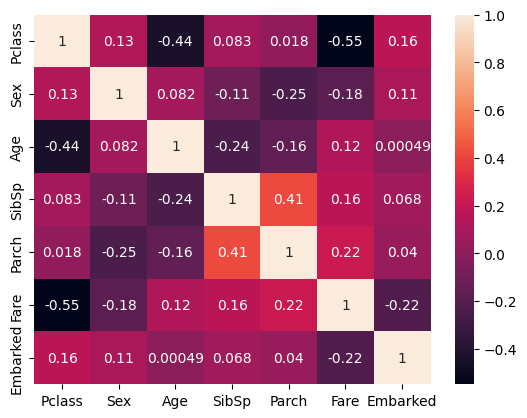

In [29]:
x = df_train.drop(columns = 'Survived')
x.corr()
sns.heatmap(x.corr(),annot = True);

In [30]:
x.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.442367,0.083081,0.018443,-0.549500,0.162098
Sex,0.131900,1.000000,0.081651,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.442367,0.081651,1.000000,-0.242878,-0.157232,0.123051,0.000493
SibSp,0.083081,-0.114631,-0.242878,1.000000,0.414838,0.159651,0.068230
Parch,0.018443,-0.245489,-0.157232,0.414838,1.000000,0.216225,0.039798
Fare,-0.549500,-0.182333,0.123051,0.159651,0.216225,1.000000,-0.224719
Embarked,0.162098,0.108262,0.000493,0.068230,0.039798,-0.224719,1.000000


## Build Model

In [31]:
y_train = df_train['Survived']
X_train = df_train.drop(columns = 'Survived')
X_test = df_test.drop(columns = 'PassengerId')
print(X_train.shape, y_train.shape, X_test.shape)

(891, 7) (891,) (418, 7)


## Make a Machine Learning to train Data

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
dtc = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier()
)

In [34]:
dtc.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [35]:
y_pre = dtc.predict(X_test)

In [36]:
display(round(100 * dtc.score(X_train, y_train), 2))

94.61

## Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier #Mengimport BaggingClassifier dari library sklearn.ensemble

bag_clf = BaggingClassifier(base_estimator=dtc, n_estimators=50,  max_features=0.5) #Membuat objek BaggingClassifier dengan menggabungkan model Random_Model yang telah dibuat sebelumnya
#dengan n_estimators=50 artinya akan dibuat 50 model baru yang masing-masing memiliki kebijakan acak yang berbeda
#max_features=0.5 berarti setiap model baru hanya akan menggunakan setengah dari fitur yang tersedia secara acak

bag_clf.fit(X_train, y_train) #Melatih model dengan menggunakan data training

BaggingClassifier(base_estimator=Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(cols=[],
                                                                use_cat_names=True)),
                                                 ('decisiontreeclassifier',
                                                  DecisionTreeClassifier())]),
                  max_features=0.5, n_estimators=50)

In [38]:
y_pred = bag_clf.predict(X_test) #Menggunakan model bagging classifier untuk melakukan prediksi pada data x_test

In [47]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pre
    })

In [48]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
